In [ ]:
import pygame
import numpy as np
import math
import noise
import matplotlib.pyplot as plt

WIDTH, HEIGHT = 800, 800
GRID_SIZE = 16
ROBOT_SIZE = 3
FORWARD_SPEED = 4
TURN_SPEED = 0.8
NUM_RAYS = 3
RAY_LENGTH = 60
NUM_ROBOTS = 50
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)

pygame.init()
screen = pygame.display.set_mode((WIDTH, HEIGHT))
clock = pygame.time.Clock()


def generate_occupancy_grid(width, height, scale=0.1, threshold=0.5):
    grid = np.zeros((height, width), dtype=int)
    seed = int(np.random.uniform(0,500))
    for y in range(height):
        for x in range(width):
            #fill in square with perlin noise (like minecraft)
            value = noise.pnoise2(x * scale, y * scale, octaves=4, persistence=0.5, lacunarity=2.0, repeatx=width, repeaty=height, base=seed)
            grid[y, x] = 1 if value < threshold else 0

    #fill in the boundary so robots don't run away
    grid[0, :] = 1 
    grid[-1, :] = 1 
    grid[:, 0] = 1  
    grid[:, -1] = 1  
    return grid

#map from continuous screen space to discrete grid map space
def grid_to_screen(x, y):
    return x * GRID_SIZE, y * GRID_SIZE

class Robot:
    #an individual robot agent

    def __init__(self, x, y, angle, speed):
        self.x = x
        self.y = y
        self.angle = angle
        self.vel_x = speed
        self.vel_y = 0

    #detect if objects are in front, to the side, how far away, etc...
    def cast_rays(self, grid):
        distances = []
        for i in range(-NUM_RAYS // 2, NUM_RAYS // 2 + 1):
            ray_angle = self.angle + (i / NUM_RAYS) * math.pi / 2
            dist = self.get_ray_distance(grid, ray_angle)
            distances.append((ray_angle, dist))
        return distances

    #get distance for intersection of ray and obstacle
    def get_ray_distance(self, grid, angle):
        for d in range(RAY_LENGTH):
            check_x = int((self.x + math.cos(angle) * d) / GRID_SIZE)
            check_y = int((self.y + math.sin(angle) * d) / GRID_SIZE)
            if 0 <= check_x < grid.shape[1] and 0 <= check_y < grid.shape[0]:
                if grid[check_y, check_x] == 1:
                    return d
        return RAY_LENGTH

    def update(self, grid):
        distances = self.cast_rays(grid)
        left_dist = distances[0][1]
        right_dist = distances[-1][1]

        if left_dist <25:
            self.angle += TURN_SPEED
        elif right_dist < 25:
            self.angle -= TURN_SPEED

        self.x += math.cos(self.angle) * FORWARD_SPEED
        self.y += math.sin(self.angle) * FORWARD_SPEED

    def draw(self):
        front = (self.x + math.cos(self.angle) * ROBOT_SIZE, self.y + math.sin(self.angle) * ROBOT_SIZE)
        left = (self.x + math.cos(self.angle + 2.5) * ROBOT_SIZE, self.y + math.sin(self.angle + 2.5) * ROBOT_SIZE)
        right = (self.x + math.cos(self.angle - 2.5) * ROBOT_SIZE, self.y + math.sin(self.angle - 2.5) * ROBOT_SIZE)    
        pygame.draw.polygon(screen, RED, [front, left, right])

grid_cols, grid_rows = WIDTH // GRID_SIZE, HEIGHT // GRID_SIZE
obstacle_grid = generate_occupancy_grid(grid_cols,grid_rows,scale=0.08,threshold=-0.07)

robots = []

for i in range(NUM_ROBOTS):

    angle = x = np.random.uniform(-np.pi,np.pi)
    speed = FORWARD_SPEED + np.random.uniform(-1,1)

    robot = Robot(WIDTH/2,HEIGHT/2,angle,speed)
    robots.append(robot)

#main loop
running = True
while running:
    screen.fill(WHITE)
    
    #render
    for y in range(grid_rows):
        for x in range(grid_cols):
            if obstacle_grid[y, x] == 1:
                pygame.draw.rect(screen, BLACK, (*grid_to_screen(x, y), GRID_SIZE, GRID_SIZE))
    for robot in robots:
        robot.update(obstacle_grid)
        robot.draw()
    
    pygame.display.flip()
    clock.tick(30)
    
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

pygame.quit()


KeyboardInterrupt: 

: 

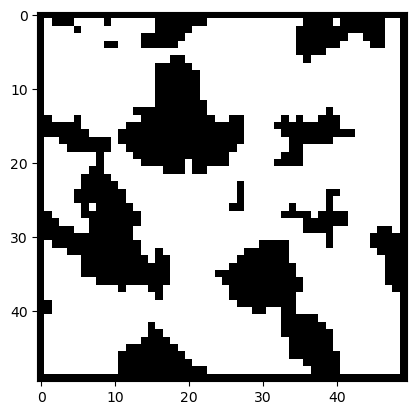

In [138]:
obstacle_grid = generate_occupancy_grid(grid_cols,grid_rows,scale=0.08,threshold=-0.07)

plt.imshow(obstacle_grid, cmap="gray_r")
